### **Downloading and Importing libraries**

In [1]:
#Install Pandas Data Reader

!pip install pandas_datareader # To acces financial data from different platforms
!pip install yfinance


In [2]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

# Single company
symbol = "TSLA"  # Tesla Inc.
data_tesla = yf.download(symbol)

[*********************100%***********************]  1 of 1 completed


### **Loading the Data**

In [3]:
df_tesla=pd.DataFrame(data_tesla)
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [4]:
df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-28,249.699997,259.880005,248.889999,256.239990,256.239990,159770800
2023-06-29,258.029999,260.739990,253.610001,257.500000,257.500000,131283400
2023-06-30,260.600006,264.450012,259.890015,261.769989,261.769989,112267600
2023-07-03,276.489990,284.250000,275.109985,279.820007,279.820007,119685900
2023-07-05,278.820007,282.939301,277.600006,279.910004,279.910004,79488364


### **Plot Time Series Data**

**Volume: How many specific number of shares are traded on that specific date**

<Axes: xlabel='Date'>

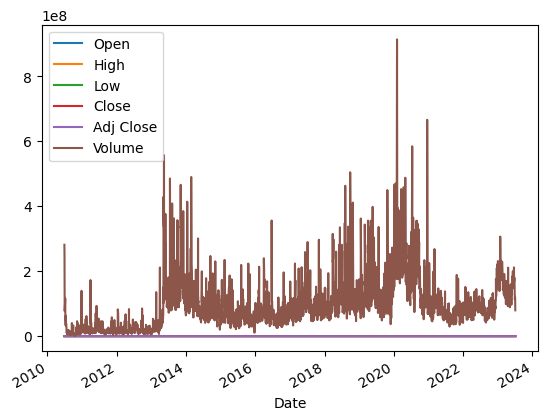

In [5]:
df_tesla.plot()

<Axes: xlabel='Date'>

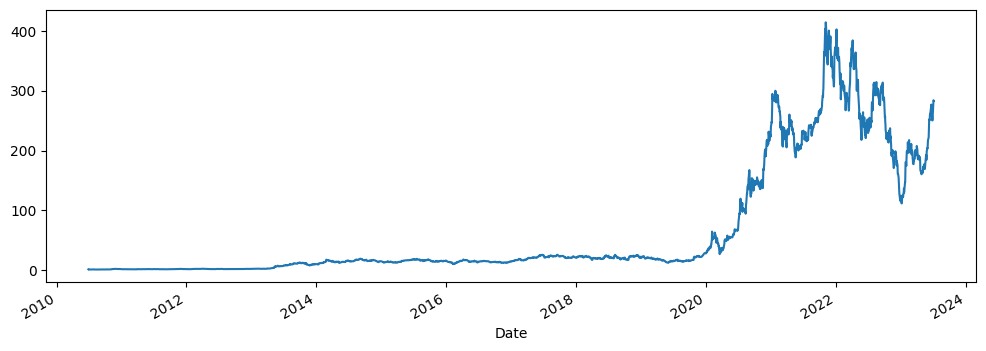

In [6]:
df_tesla["High"].plot(figsize=(12,4))

We can see that price has gone down in 2023(probably because Russia-Ukraine War affecting stock prices)

<Axes: xlabel='Date'>

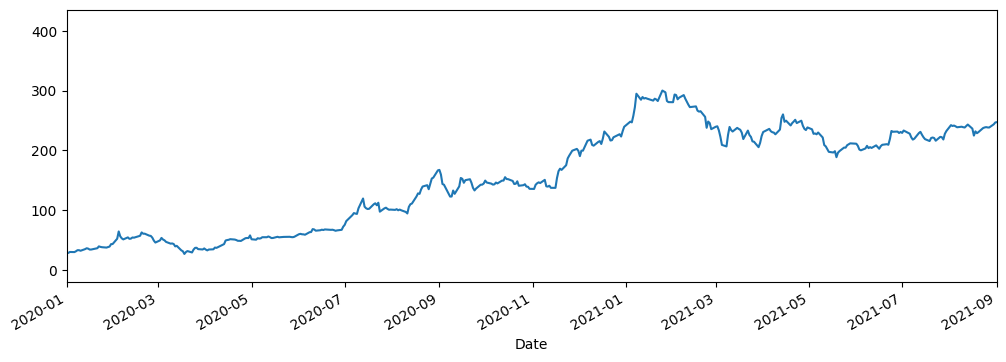

In [7]:
#xlimit
#We are extracting data for specific dates which is 2020 Jan- 2021 Sep
df_tesla["High"].plot(xlim=["2020-01-01","2021-09-01"],figsize=(12,4))

<Axes: xlabel='Date'>

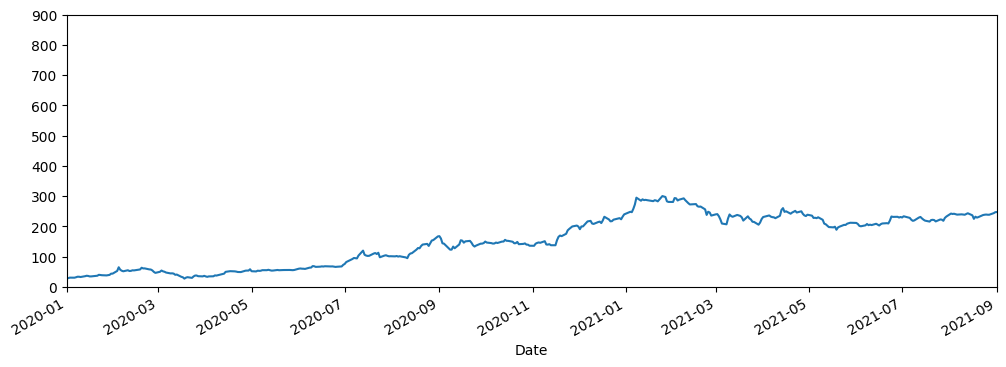

In [8]:
#xlimit and ylimit
df_tesla["High"].plot(xlim=["2020-01-01","2021-09-01"],ylim=[0,900],figsize=(12,4))

<Axes: xlabel='Date'>

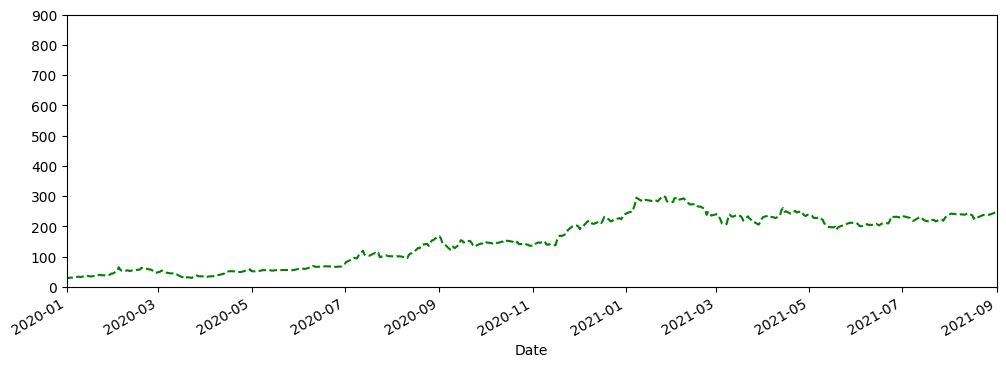

In [9]:
#xlimit and ylimit and coloring and linestyle(ls)
df_tesla["High"].plot(xlim=["2020-01-01","2021-09-01"],ylim=[0,900],figsize=(12,4),ls="--", c="green")

In [10]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-26',
               '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30',
               '2023-07-03', '2023-07-05'],
              dtype='datetime64[ns]', name='Date', length=3276, freq=None)

In [11]:
index=df_tesla.loc["2020-01-01":"2021-09-01"].index

In [12]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [13]:
share_open = df_tesla.loc["2020-01-01":"2021-09-01"]["Open"] # Access rows and columns

In [14]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

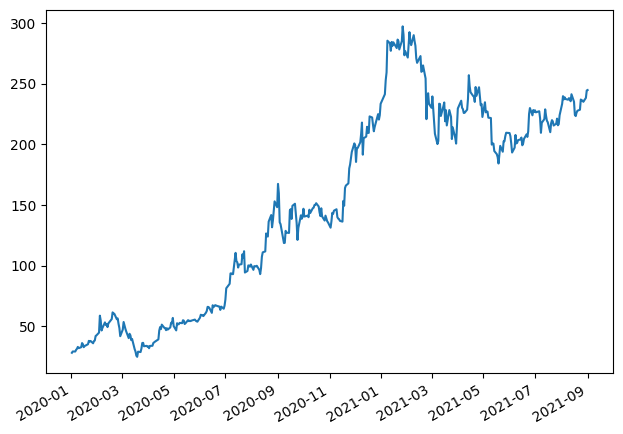

In [16]:
figure, axis = plt.subplots()
plt.tight_layout()
#preventing overlapping
figure.autofmt_xdate() #autoformat xdate to prevent overlapping of dates
axis.plot(index,share_open)

In [17]:
##  Datetime Index
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-26',
               '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30',
               '2023-07-03', '2023-07-05'],
              dtype='datetime64[ns]', name='Date', length=3276, freq=None)

In [18]:
df_tesla=df_tesla.reset_index() # geberally when datetiem is given it is in object format means in str format in order to convert it in datetime use datetime

In [19]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3276 non-null   datetime64[ns]
 1   Open       3276 non-null   float64       
 2   High       3276 non-null   float64       
 3   Low        3276 non-null   float64       
 4   Close      3276 non-null   float64       
 5   Adj Close  3276 non-null   float64       
 6   Volume     3276 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 179.3 KB


In [20]:
pd.to_datetime(df_tesla["Date"])

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3271   2023-06-28
3272   2023-06-29
3273   2023-06-30
3274   2023-07-03
3275   2023-07-05
Name: Date, Length: 3276, dtype: datetime64[ns]

In [21]:
# To Reset back the datetime to index

df_tesla=df_tesla.set_index("Date",drop=True) #inplace can also be used instead of reassigning dataframe

In [22]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [23]:
##datetime
from datetime import datetime  # You can play with datetime data with the help of this function a lot

In [24]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [25]:
datetime.now()

datetime.datetime(2023, 7, 5, 17, 0, 48, 424212)

In [26]:
def add_num(num1,num2):
  return num1+num2

In [27]:
start_time=datetime.now()
num1=20
num2=30

add_num(num1,num2)
end_time=datetime.now()
print(end_time-start_time)


0:00:00.000201


In [28]:
date = datetime(2021,11,21)

In [29]:
date

datetime.datetime(2021, 11, 21, 0, 0)

In [30]:
date.date()

datetime.date(2021, 11, 21)

In [31]:
date.day

21

In [32]:
date.weekday()

6

In [33]:
date.year

2021

In [34]:
date.month

11

### **Time Resampling**

In [35]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [36]:
df_tesla.resample(rule="A").min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


In [37]:
df_tesla.resample(rule="A").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


max is a aggregate function

<Axes: xlabel='Date'>

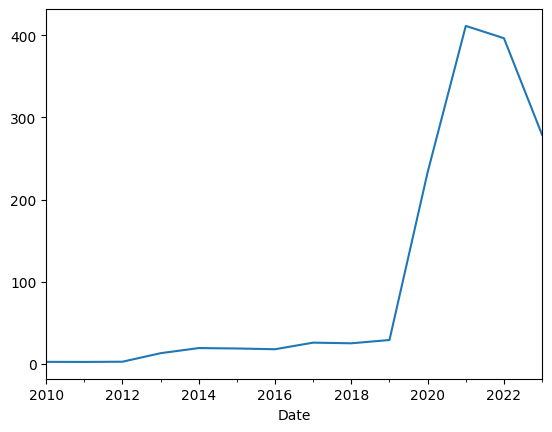

In [38]:
##year end frequency
df_tesla.resample(rule="A").max()["Open"].plot()

We can observe how big rise in price is there from 2018 to 2020.

<Axes: xlabel='Date'>

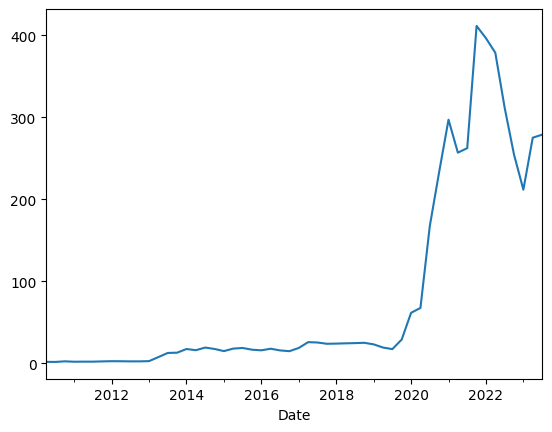

In [39]:
##quarterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule="QS").max()["Open"].plot()

In [40]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


In [41]:
##Business Quarters
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='BQS').max() #when business is getting started

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028000,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728000,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428000,2.316667,2.364667,2.364667,139528500
2011-01-03,1.906000,1.914000,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100000,1.970000,2.009333,2.009333,93138000
2011-07-01,1.992667,2.029333,1.934000,1.982000,1.982000,45967500
2011-10-03,2.308667,2.333333,2.268667,2.329333,2.329333,58024500
2012-01-02,2.546000,2.663333,2.474000,2.529333,2.529333,82506000
2012-04-02,2.488667,2.564667,2.444667,2.534000,2.534000,83344500


<Axes: xlabel='Date'>

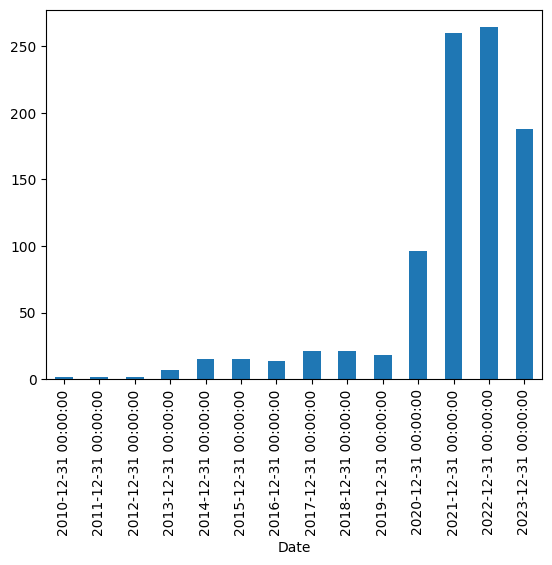

In [42]:
##plotting

df_tesla["Open"].resample(rule='A').mean().plot(kind="bar")

<Axes: xlabel='Date'>

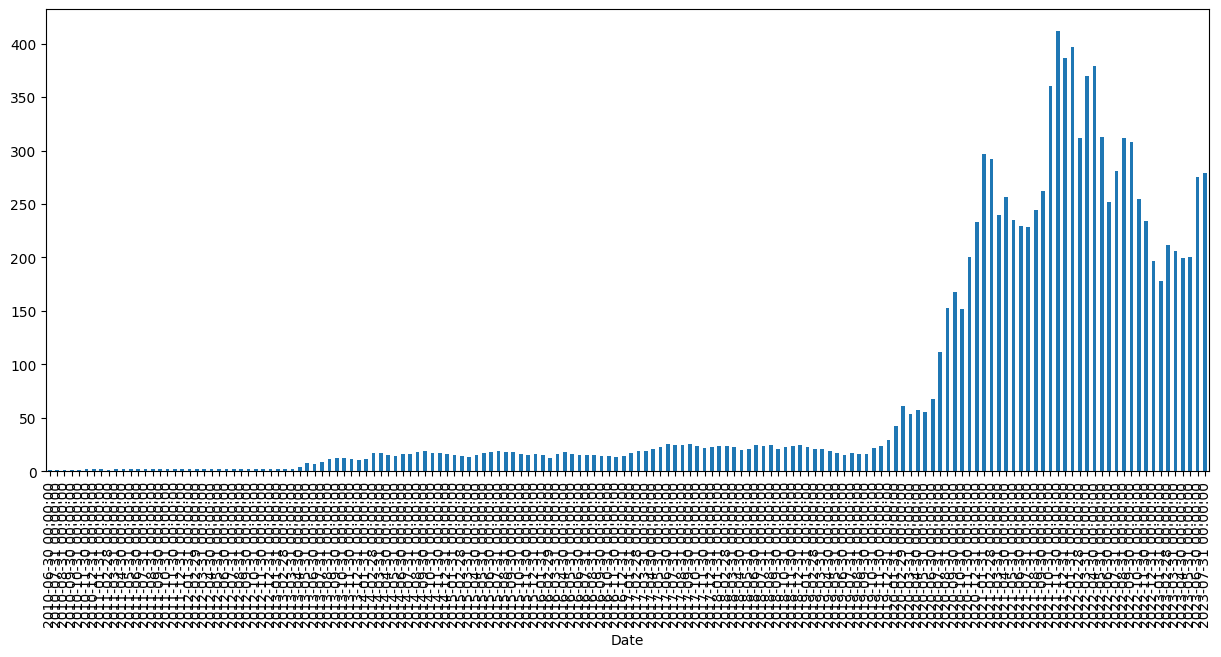

In [43]:

df_tesla["Open"].resample(rule='M').max().plot(kind="bar",figsize=(15,6)) # To get monthly mean

### **Rolling**

Rolling helps in moving window average.

**Moving window average**, also known as the **rolling average or moving average**, is a statistical calculation used to analyze time series data or sequences of numbers. It smooths out the fluctuations or noise in the data by calculating the average of a fixed number of consecutive data points within a moving window.

Here's how it works:

Define the window size: Determine the number of data points you want to include in each calculation. For example, if you have a time series with 100 data points and choose a window size of 10, each calculation will involve 10 data points.

Start at the beginning of the data sequence.

Calculate the average: Take the arithmetic mean of the data points within the current window. Add up the values of the data points and divide the sum by the window size.

Move the window: Slide the window by one data point to the right.

Repeat steps 3 and 4 until you reach the end of the data sequence.

The moving window average provides a **smoothed representation of the data** by reducing short-term fluctuations and highlighting long-term trends or patterns. It is commonly used in various fields, including finance, economics, signal processing, and data analysis, to identify underlying trends and make predictions based on historical data.

Different variations of moving averages exist, such as simple moving average (SMA), weighted moving average (WMA), and exponential moving average (EMA). Each variation applies a specific weight or calculation method to the data points within the moving window.

Mean Average we calculates using Rolling Window.

In [44]:
df_tesla["High"].rolling(10).mean()

#rolling of 10 days means windows is of size 10 , axis=1 for columns
#calculate the mean for High columns for rolling mean

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2023-06-28    263.195003
2023-06-29    263.112001
2023-06-30    263.662001
2023-07-03    265.727000
2023-07-05    266.545930
Name: High, Length: 3276, dtype: float64

In [45]:
df_tesla["Open: 30 days rolling"] = df_tesla["Open"].rolling(30).mean()

In [46]:
df_tesla.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,NaN
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,NaN
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,NaN
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,NaN


<Axes: xlabel='Date'>

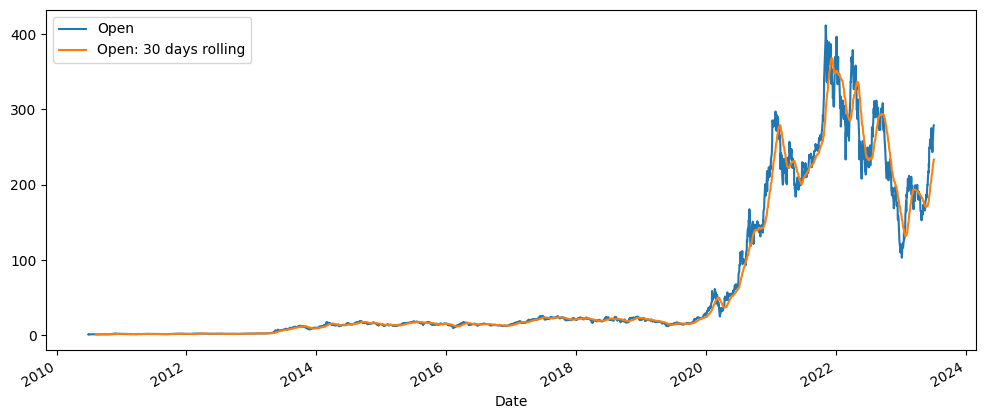

In [47]:
df_tesla[["Open","Open: 30 days rolling"]].plot(figsize=(12,5))

Observe how smooth the graph has become. Orange line is smoother version of blue one.

The basic idea of time series data is as follows:

Imagine we have data for air conditioner sales:

In summer, AC sales are high because inflation increases the prices.

In winters, AC sales are lower.

Upward trend: The average sales will keep increasing as we move forward. Think of a zigzag line that goes diagonally upward from 0 to the top right corner.

Downward trend: Think of a zigzag line that goes diagonally upward from 0 to the bottom right corner.

Stationary: When the data remains on the same line, calculating the mean will yield a consistent value. First, we convert the stationary data into seasonal data before performing forecasting. To achieve this, we convert an upward trend into stationary data.

Cyclic data: This type of data fluctuates up and down, similar to stock market trends. It is challenging to analyze because it is influenced by people's sentiments and economics.

Sales data can be easily forecasted.